In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
pd.pandas.set_option("display.max_columns",None)
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
#Read the CSV file "spotify-2023.csv" into a DataFrame and assign it to the variable df1
df1=pd.read_csv("spotify-2023.csv",encoding= 'unicode_escape')

In [4]:
#Display the first few rows of the DataFrame df1 using the head() function
df1.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [5]:
#Get the dimensions (number of rows and columns) of the DataFrame df1 using the shape attribute
df1.shape

(953, 24)

In [6]:
# Print a message indicating that you are printing information about input features
print("Input Features in this dataset are:")
count=1
print("")
# Print a header for the feature information table
print("S.no"," ","Feature name"," ","Datatypes")
# Iterate over the columns and their corresponding data types in the DataFrame
for i,j in zip(df1.columns,df1.dtypes):
  # Exclude the "streams" feature from the input features
    if i!="streams":
      # Print the serial number, feature name, and data type
        print(count,'.',i," ",j)
        count=count+1     # Increment the counter
# Print a message indicating the output feature and its data type
print("Output Feature in this dataset is:streams int64")

Input Features in this dataset are:

S.no   Feature name   Datatypes
1 . track_name   object
2 . artist(s)_name   object
3 . artist_count   int64
4 . released_year   int64
5 . released_month   int64
6 . released_day   int64
7 . in_spotify_playlists   int64
8 . in_spotify_charts   int64
9 . in_apple_playlists   int64
10 . in_apple_charts   int64
11 . in_deezer_playlists   object
12 . in_deezer_charts   int64
13 . in_shazam_charts   object
14 . bpm   int64
15 . key   object
16 . mode   object
17 . danceability_%   int64
18 . valence_%   int64
19 . energy_%   int64
20 . acousticness_%   int64
21 . instrumentalness_%   int64
22 . liveness_%   int64
23 . speechiness_%   int64
Output Feature in this dataset is:streams int64


<b>track_name</b>: Name of the song
    
<b>artist(s)_name</b>: Name of the artist(s) of the song
    
<b>artist_count</b>: Number of artists contributing to the song
    
<b>released_year</b>: Year when the song was released
    
<b>released_month</b>: Month when the song was released
    
<b>released_day</b>: Day of the month when the song was released
    
<b>in_spotify_playlists</b>: Number of Spotify playlists the song is included in
    
<b>in_spotify_charts</b>: Presence and rank of the song on Spotify charts
    
<b>streams</b>: Total number of streams on Spotify
    
<b>in_apple_playlists</b>: Number of Apple Music playlists the song is included in
    
<b>in_apple_charts</b>: Presence and rank of the song on Apple Music charts
    
<b>in_deezer_playlists</b>: Number of Deezer playlists the song is included in
    
<b>in_deezer_charts</b>: Presence and rank of the song on Deezer charts
    
<b>in_shazam_charts</b>: Presence and rank of the song on Shazam charts
    
<b>bpm</b>: Beats per minute, a measure of song tempo
    
<b>key</b>: Key of the song
    
<b>mode</b>: Mode of the song (major or minor)
    
<b>danceability_%</b>: Percentage indicating how suitable the song is for dancing
    
<b>valence_%</b>: Positivity of the song's musical content
    
<b>energy_%</b>: Perceived energy level of the song
    
<b>acousticness_%</b>: Amount of acoustic sound in the song
    
<b>instrumentalness_%</b>: Amount of instrumental content in the song
    
<b>liveness_%</b>: Presence of live performance elements
    
<b>speechiness_%</b>: Amount of spoken words in the song

In [7]:
# Generate descriptive statistics for the DataFrame df1 using the describe() function
df1.describe()
# This function provides information such as count, mean, std (standard deviation), min, 25th percentile, median (50th percentile), 75th percentile, and max for numerical columns in the DataFrame
# It gives a quick summary of the central tendency and spread of the numerical data in the DataFrame


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [8]:
df1.isna().sum()
#The missing value features in this dataset are in_shazam_charts and key

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [9]:
# Convert the "in_shazam_charts" column to numeric values, removing commas and handling errors by coercing to NaN
df1["in_shazam_charts"] = pd.to_numeric(df1["in_shazam_charts"].str.replace(',', ''), errors='coerce', downcast='integer')
# Convert the "in_deezer_playlists" column to numeric values, removing commas and handling errors by coercing to NaN
df1["in_deezer_playlists"] = pd.to_numeric(df1["in_deezer_playlists"].str.replace(',', ''), errors='coerce', downcast='integer')

This two columns are numeric values but they were filled in a string format included with commas so we converted them into integer again


In [10]:
# Initialize an empty list to store the names of numerical features
numerical_features=[]
# Iterate through the columns of the DataFrame df1
for feature in df1.columns:
  # Check if the data type of the current column is not 'object' (i.e., not a string)
    if df1[feature].dtypes!='O':
      # If it's not a string, add the feature name to the list of numerical features
        numerical_features.append(feature)

This code will give numerical features from dataframe

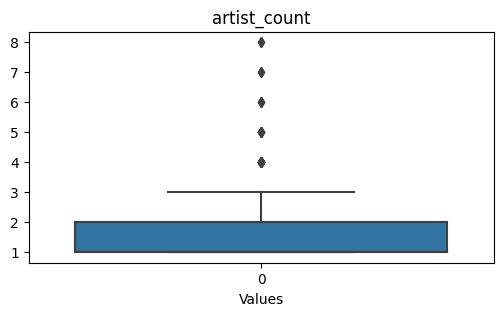

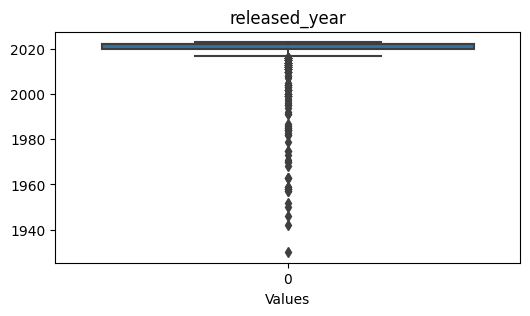

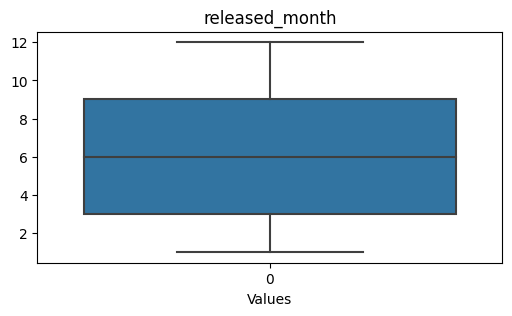

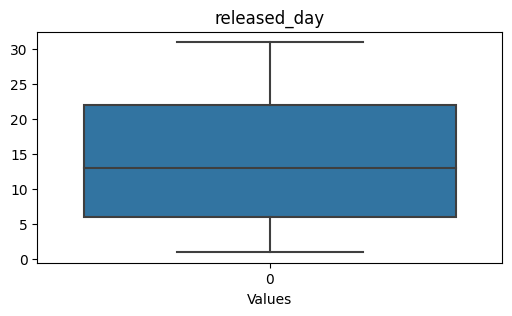

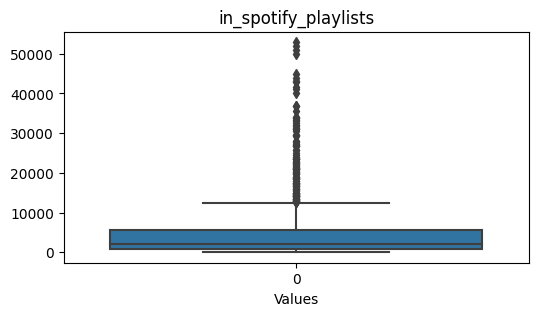

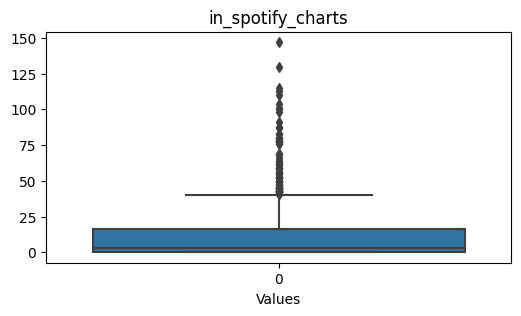

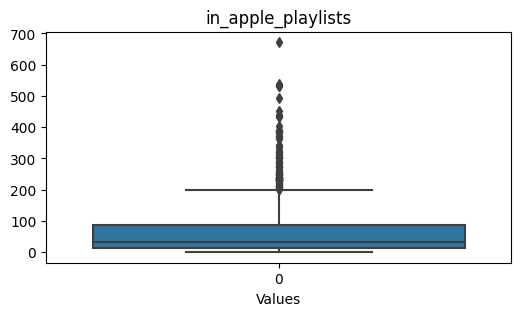

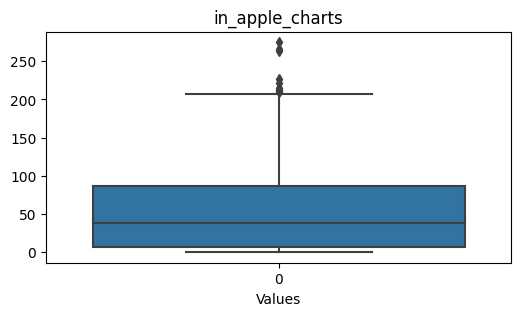

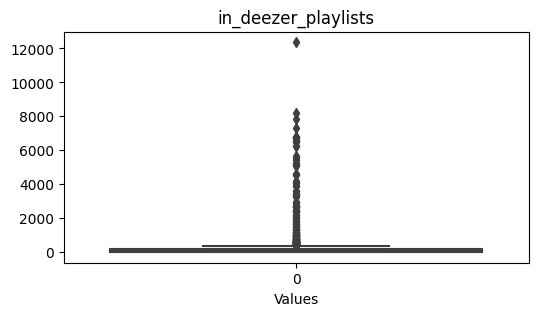

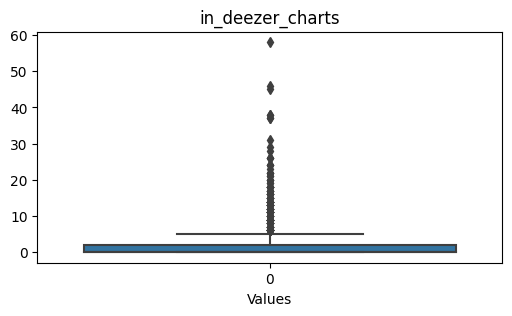

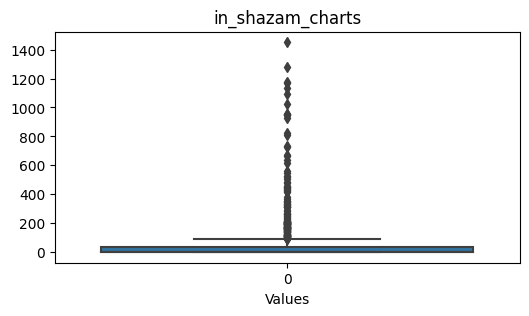

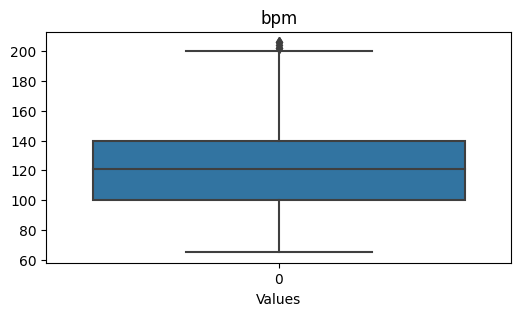

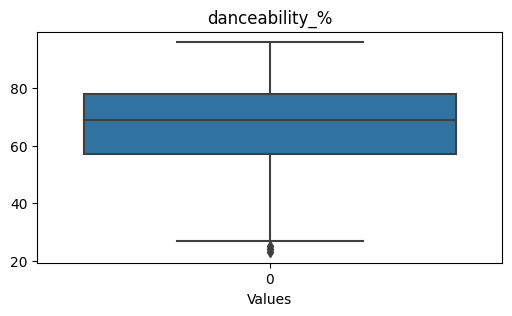

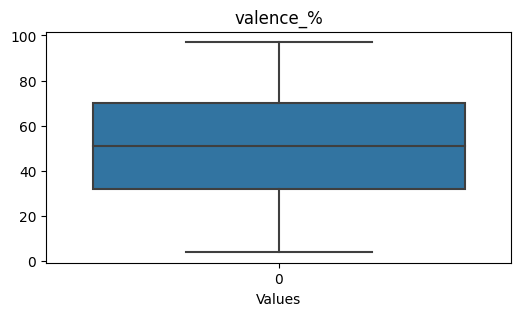

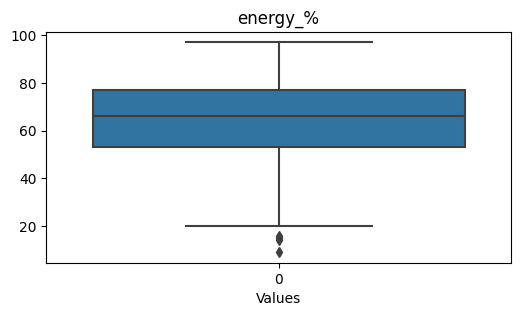

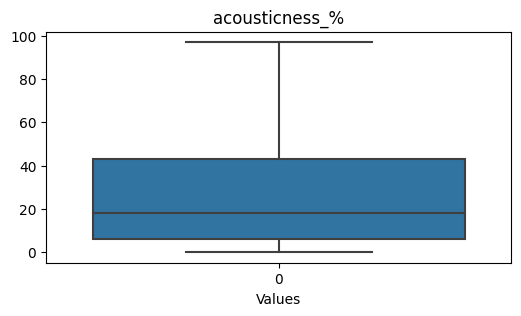

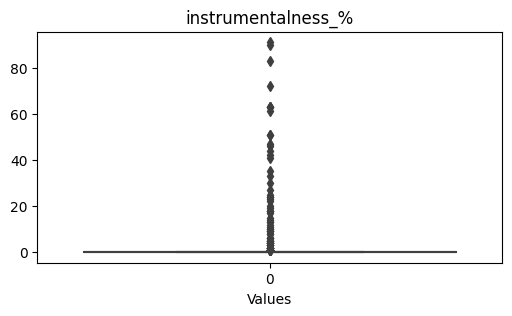

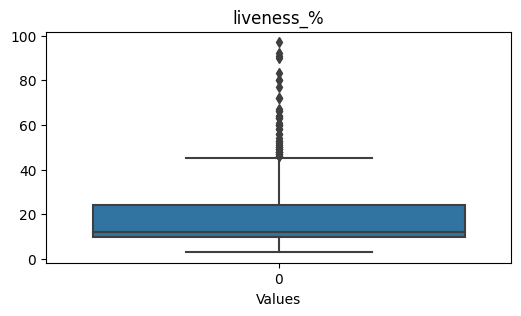

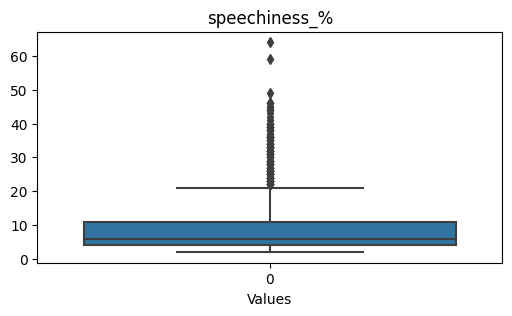

In [11]:
# Iterate through each numerical feature in the list numerical_features
for feature in numerical_features:
  # Create a new figure with a specific size
    plt.figure(figsize=(6,3))
    # Use Seaborn to create a vertical boxplot for the current numerical feature
    sns.boxplot(data=df1[feature],orient='v')
    # Set the title of the boxplot to the current feature name
    plt.title(feature)
    # Set the label for the x-axis
    plt.xlabel("Values")
    # Display the boxplot
    plt.show()

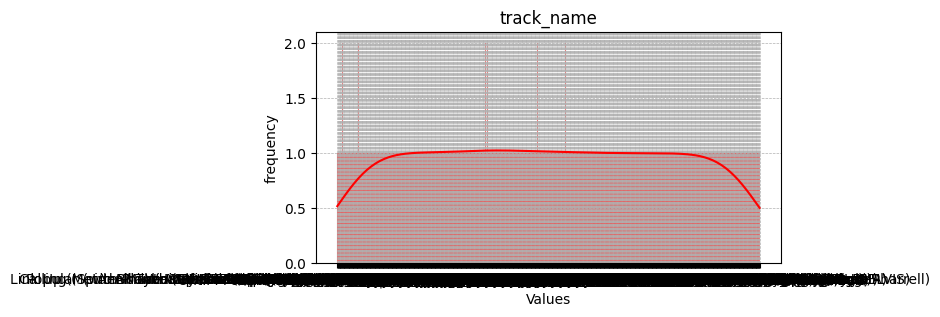

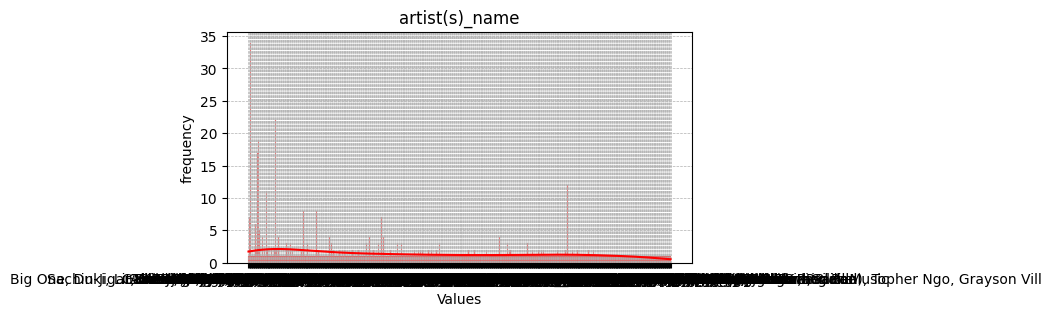

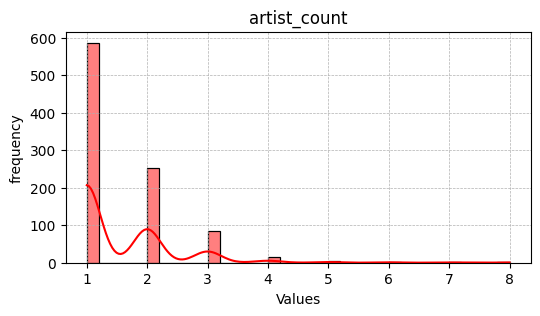

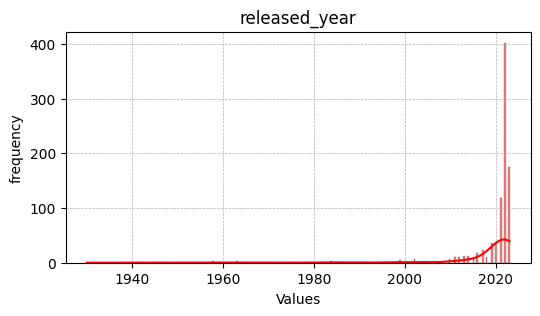

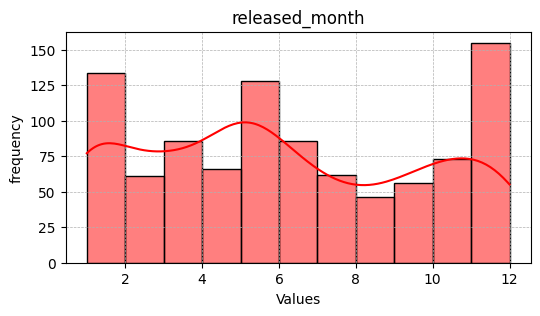

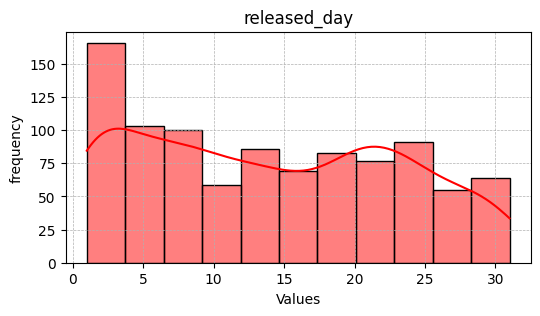

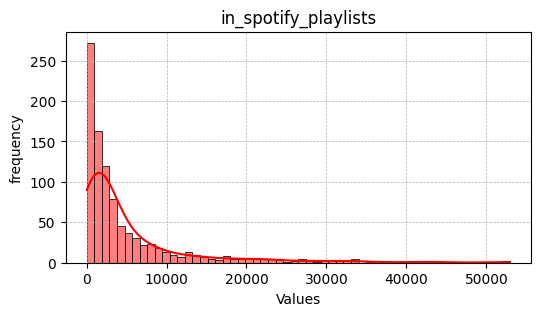

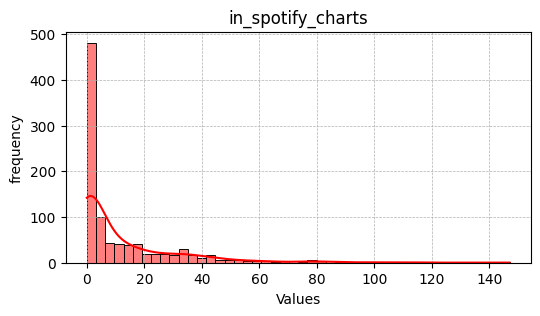

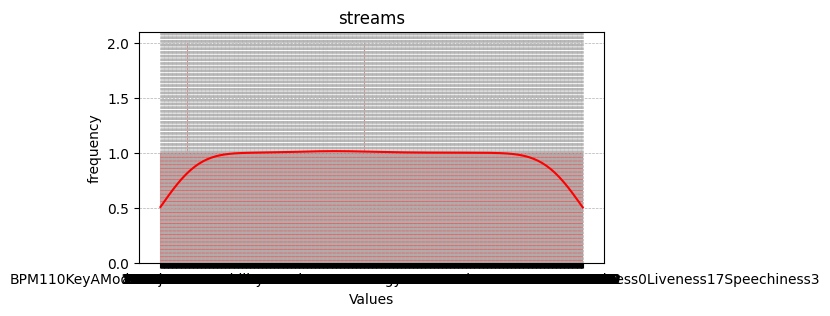

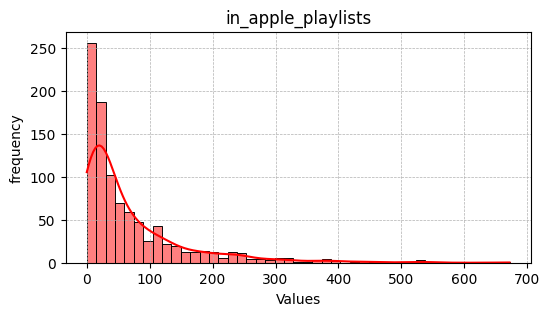

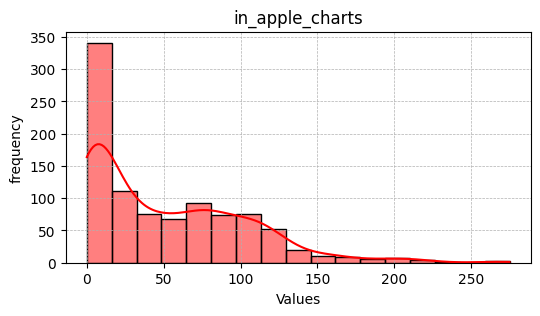

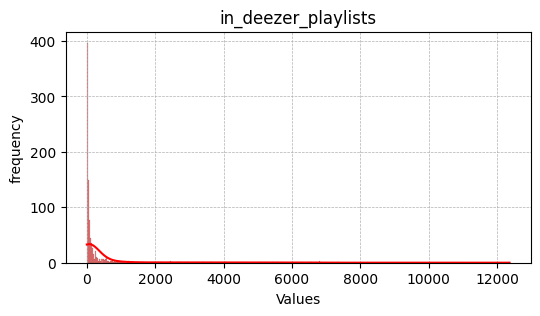

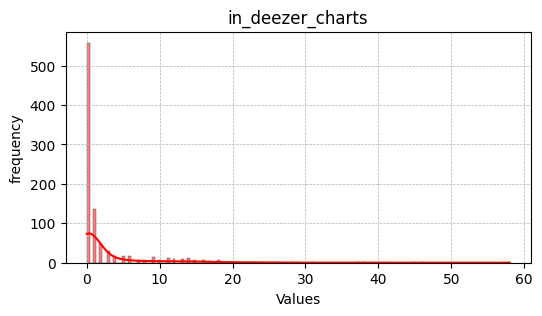

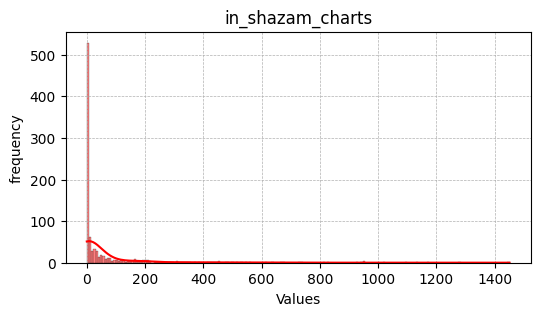

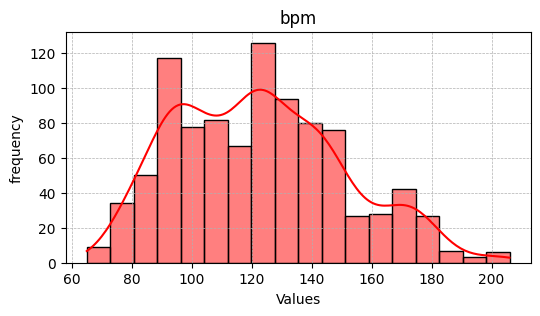

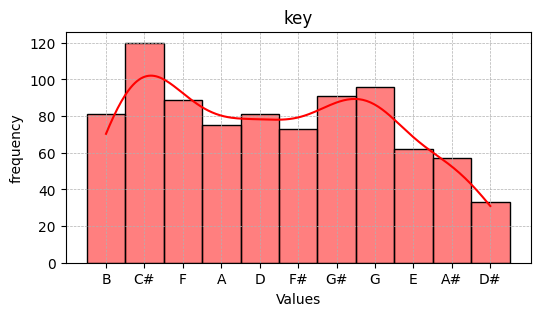

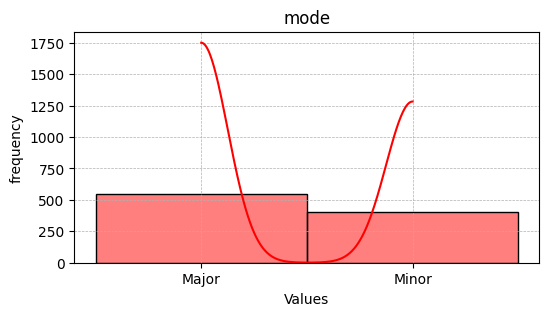

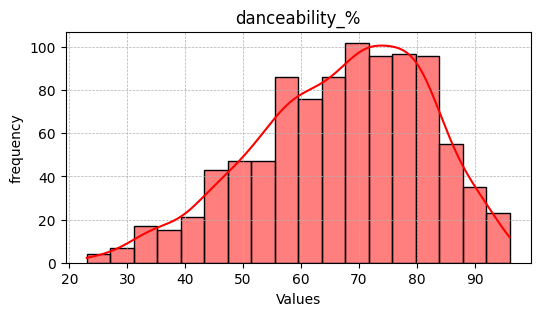

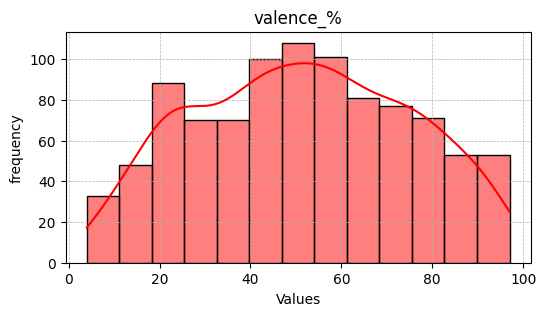

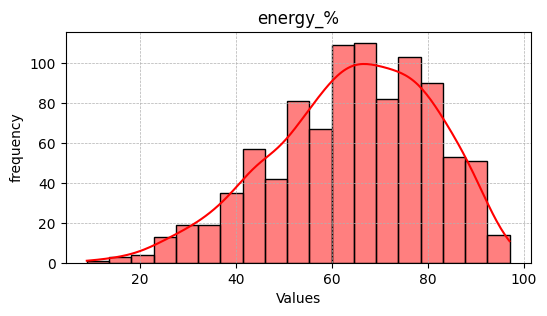

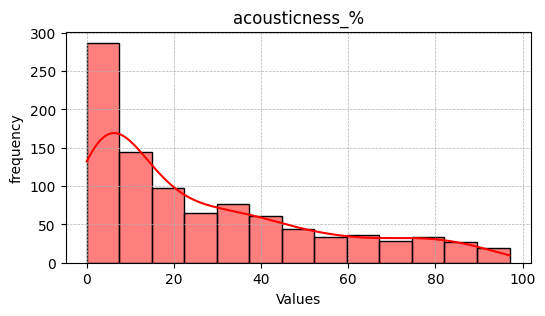

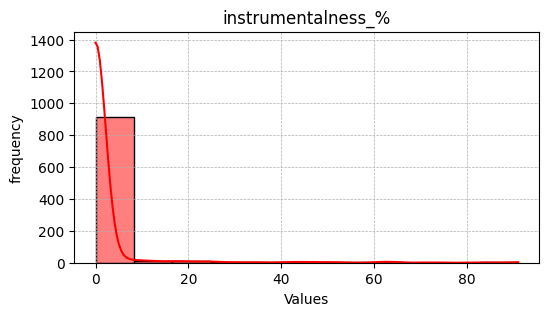

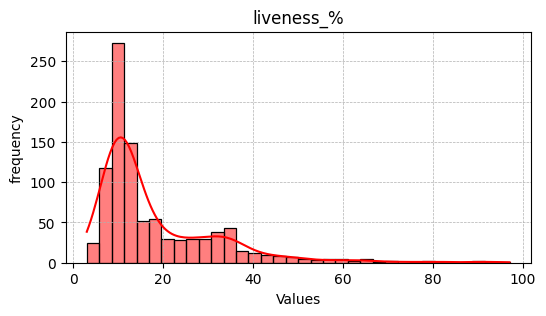

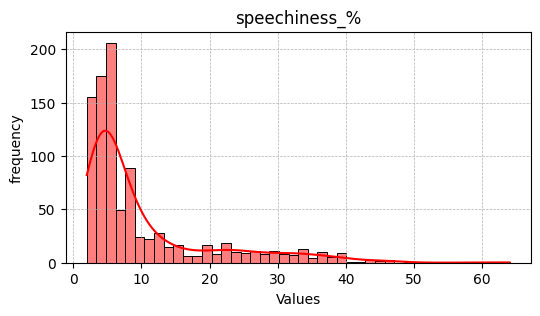

In [12]:
# Iterate through each feature in the DataFrame df1
for feature in df1:
  # Create a new figure with a specific size
    plt.figure(figsize=(6,3))
    # Use Seaborn to create a histogram with kernel density estimation (KDE) for the current feature
    sns.histplot(data=df1[feature],kde=True,color='red')
    # Set the title of the histogram to the current feature name
    plt.title(feature)
    # Set the labels for the x-axis and y-axis
    plt.xlabel("Values")
    plt.ylabel("frequency")
    # Add grid lines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Display the histogram
    plt.show()


- It looks like most of the songs were create by 1 artist or a group of 2 artists there are very less songs which were created by group more than 2

- It looks like most of the songs in this data are from 2000 there are very less songs in this data which are before 2000

- It looks like most of the songs released in this data are released in between in january-febrauary or in between November-december

- It looks like most of the songs in spotify are there in between 1-10000 playlist after that there are very less songs which we can see where are there in more than 10000 playlists

- The playlist data in apple music is less compared to spotify playlists data and sezzer playlist data

- It looks like all the playlist data are following powerlaw distribution

- It looks like most of the songs in this data are using less than 10 words in  their songs

- energy data  is very close to fallowing normal distribution

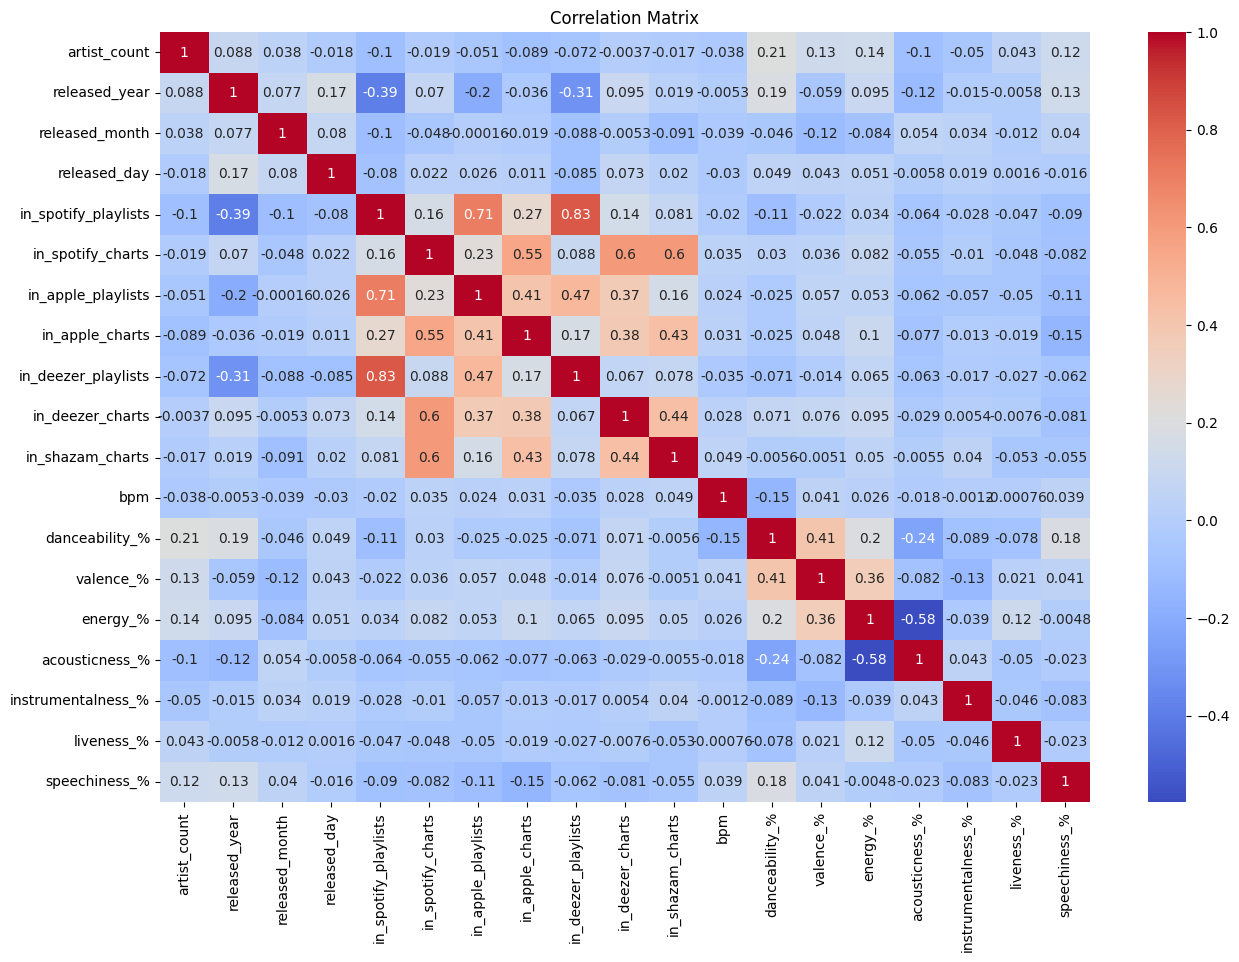

In [13]:
# Select numerical columns in the DataFrame df1
numeric_data = df1.select_dtypes(include=[np.number])
# Compute the correlation matrix for the selected numerical columns
correlation_matrix = numeric_data.corr()
# Create a new figure with a specific size
plt.figure(figsize=(15, 10))
# Use Seaborn to create a heatmap of the correlation matrix with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Set the title of the heatmap
plt.title("Correlation Matrix")
# Display the heatmap
plt.show()

- All the data related to playlists  like spotify playlists ,Apple playlists ,Dezzer playlists are positively corealted which tells that a song which is popular among playlists in one platform is popular in other platform playlists also

- All the data related to ranking like spotify charts,Apple charts ,Dezzer charts ,shazam charts are positively coralated which tells that a song popular in platform is most of the times popular in the other platforms also

- We can see a positive corelation between danceablity,valency,energy also which tells us a song with good valency may have high   energy and dancebility value and vice versa

- accousticness and energy are highly negative correalted Which implies songs eith high accousticness have less energy levels in them

- And It looks like accousticness is negatively correalted with many other features in the data

- All the types of playlists data is negatively correlated with released year

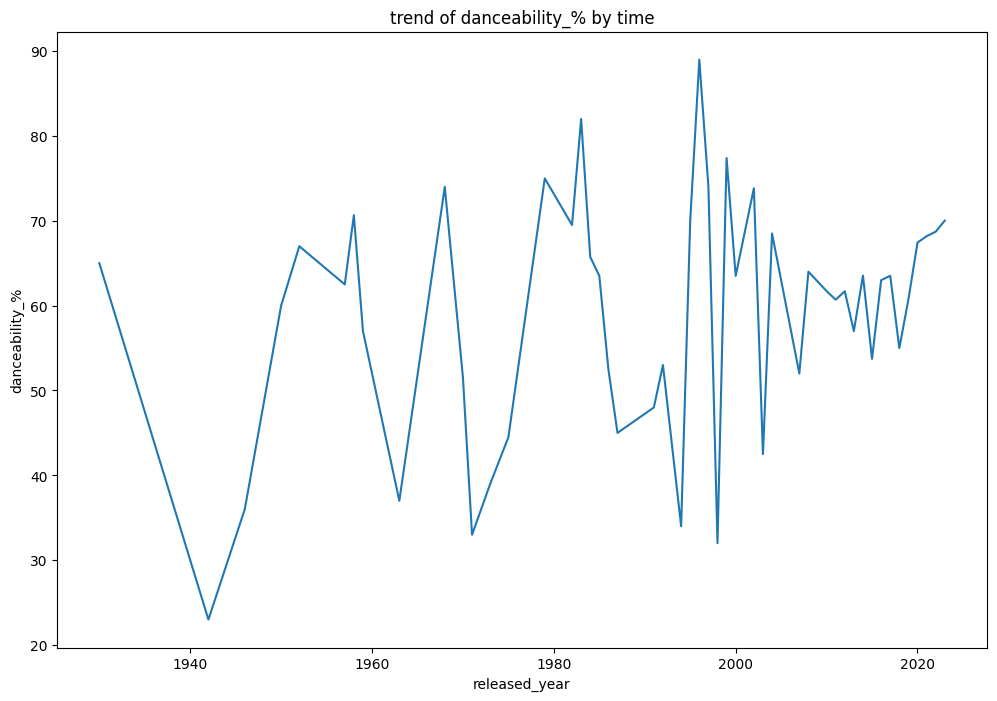

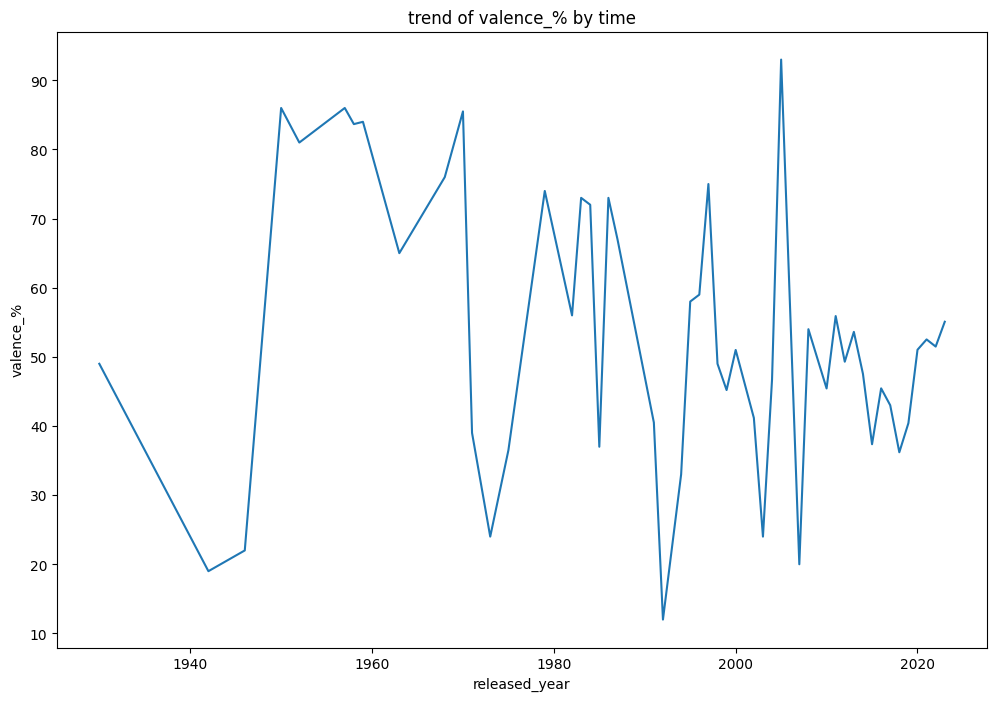

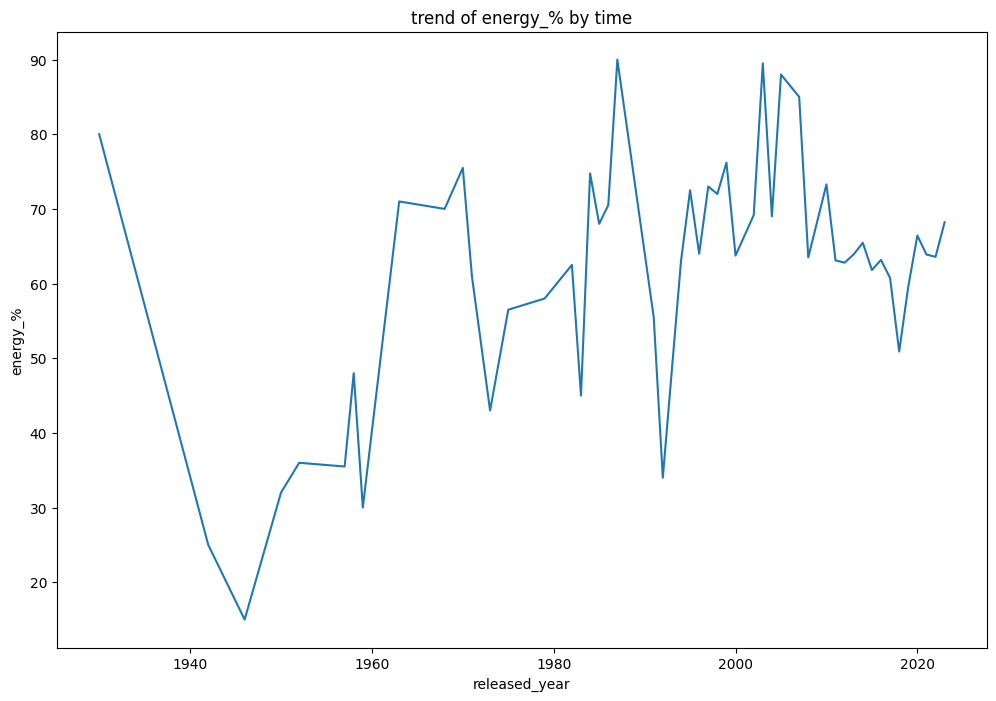

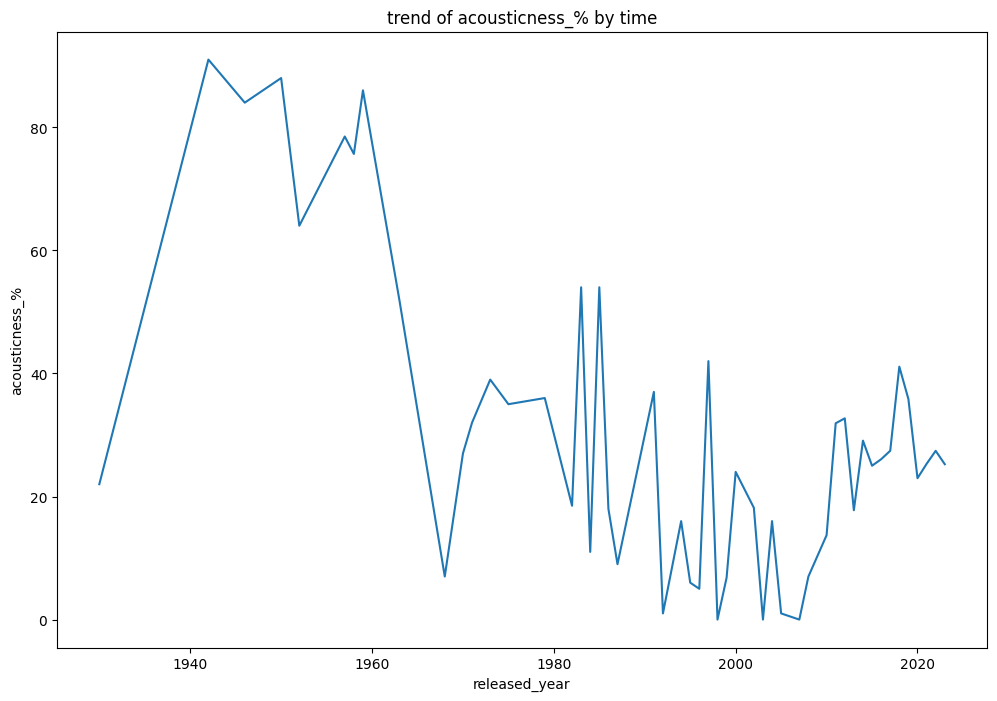

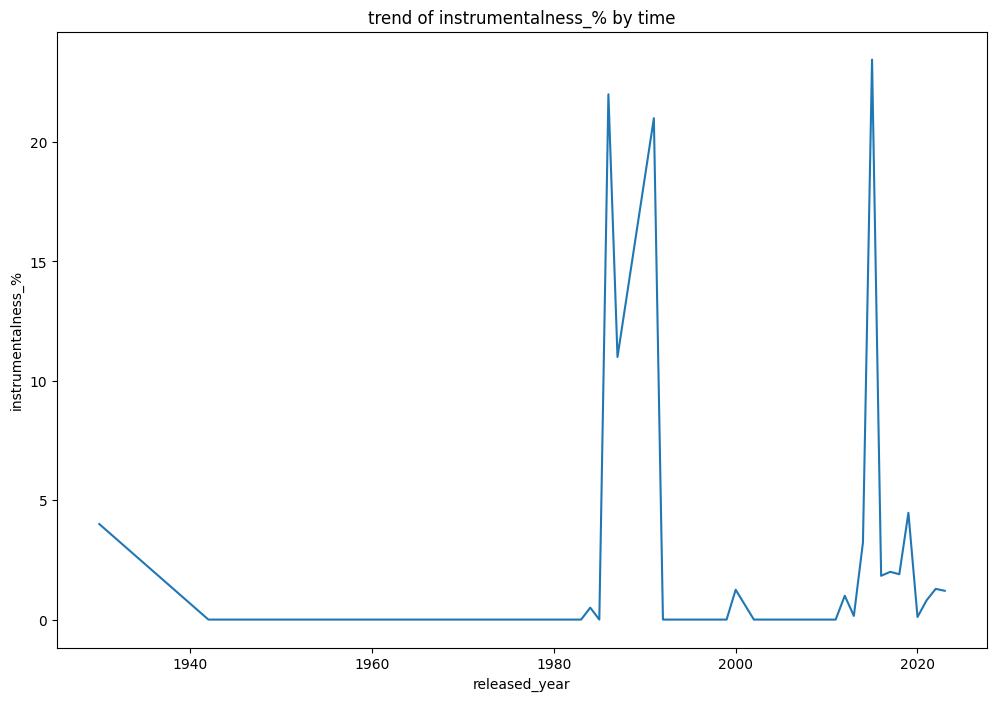

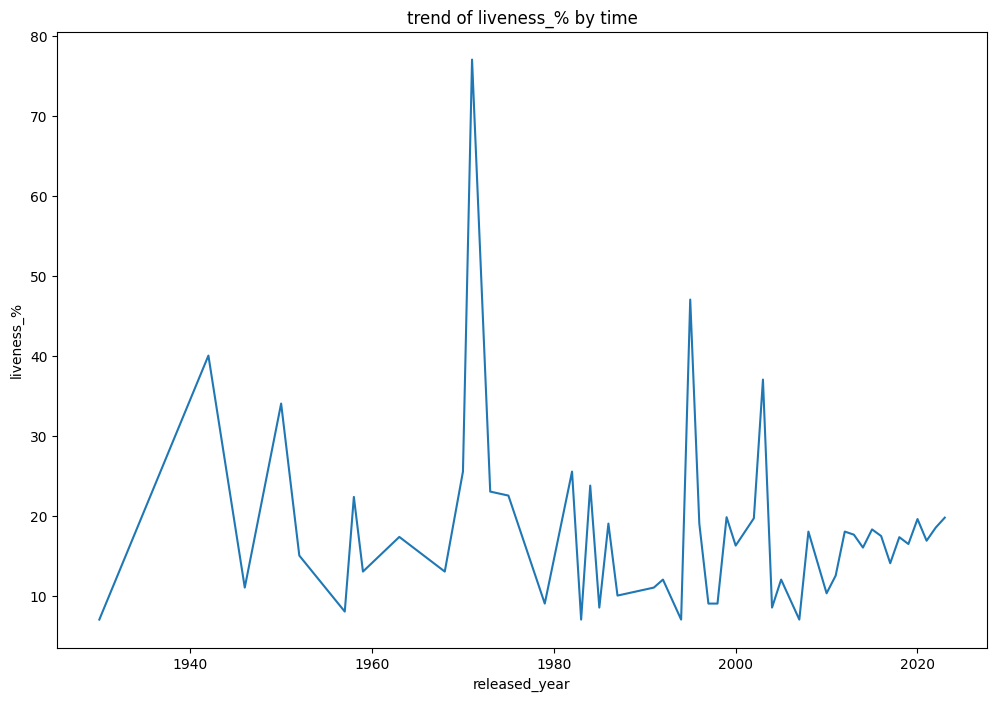

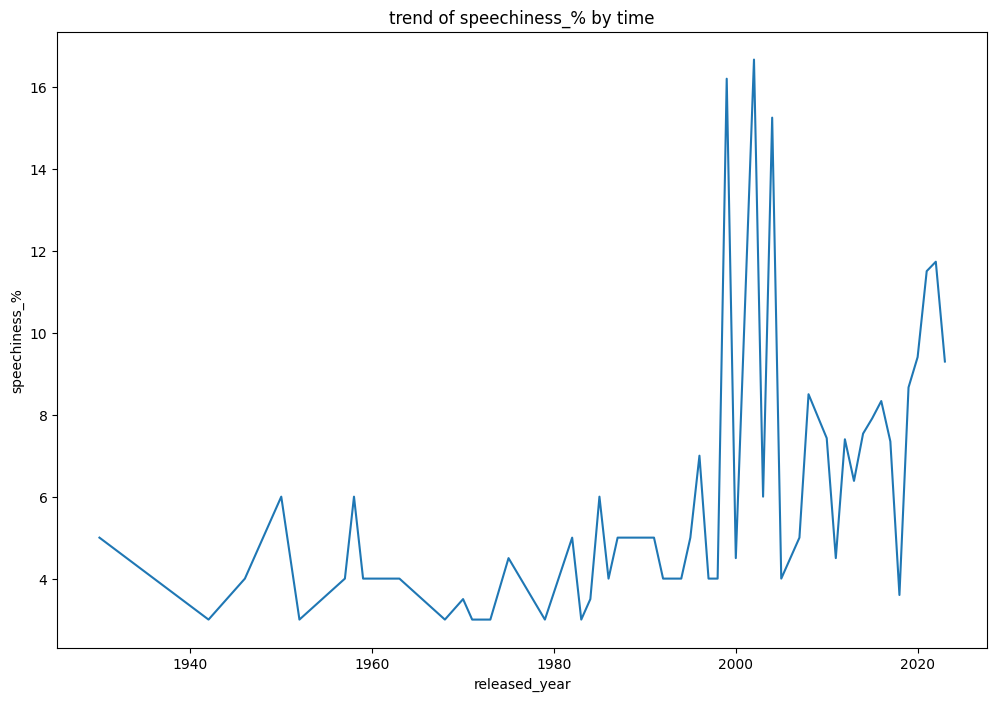

In [14]:
#timeseries analysis
# List of features to analyze over time
features1 = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
# Group the data by 'released_year' and calculate the mean for each feature
dp_time_grouped = df1.groupby('released_year')[features1].mean().reset_index()

# Iterate through each feature and create a line plot for its trend over time
for feature in features1:
    plt.figure(figsize=(12, 8))  # Create a new figure with a specific size
     # Use Seaborn to create a line plot for the current feature over the years
    sns.lineplot(data=dp_time_grouped, x='released_year', y=feature)
     # Set the x-axis and y-axis labels
    plt.xlabel("released_year")
    plt.ylabel(feature)
    plt.title(f"trend of {feature} by time")  # Set the title of the line plot
    plt.show() # Display the line plot

- AS we can see from from the speechness graph as the time proceeded  speechness increaes that is number of words in lyrics increased

- Accousticness in songs was popular during 1940 to 1960 after that accousticness in the songs decreased

- energy of the songs was low during 1940 but from 1960 energy is songs also incresed

- Intial upto 1980 Instrumental content in the songs was very less it took a boom in 1980 and again falled in 200 and took boom in 2020 for a small period of time

- Live performance element was very high during 1980 but before and after it it is decreased

- During 1980-2000 most of the song produced are suitable for dancing after that it decresed slightly before that there were many songs which were suitable for dancing but during this period many songs produced which can be used for dancing

In [15]:
# Map the values in the 'mode' column from strings to numerical values
df1['mode']=df1['mode'].map({"Major":1,"Minor":0})

Encoding mode feature

In [16]:
# Get the unique values in the 'streams' column of the DataFrame df1
df1['streams'].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [17]:
df1[df1['streams']=="BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3"]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,0,54,0,0.0,110,A,1,53,75,69,7,0,17,3


In [18]:
df1.drop([574],inplace=True)

In [19]:
df1.drop([578],inplace=True)
# Drop the row with index 577 from the DataFrame df1 in place



In [20]:
# Attempt to convert the 'streams' column to the 'int64' data type
df1['streams'].astype('int64')

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 951, dtype: int64

In [21]:
# Create a new DataFrame df2 by selecting all rows and columns from the third column onward in df1
df2=df1.iloc[:,2:]


In [22]:
# Calculate the number of unique values in the 'track_name' column
unique1=len(df1['track_name'].unique())

# Calculate the number of unique values in the 'artist(s)_name' column
unique2=len(df1['artist(s)_name'].unique())

# Print the number of unique values for each column
print("unique values in track_name:",unique1)
print("unique values in artist(s)_name:",unique2)

unique values in track_name: 941
unique values in artist(s)_name: 644


removing artist name and playlist because both columns unique value are very high  which in a regression task is not useful

In [23]:
# Create the input features (X) by dropping the 'streams' column from df2
X=df2.drop(['streams'],axis=1)

# Create the target variable (Y) by selecting only the 'streams' column and converting it to 'int64'
Y=df2['streams'].astype('int64')

In [24]:
Y.dtype

dtype('int64')

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X_train: features for training, X_test: features for testing
# Y_train: target variable for training, Y_test: target variable for testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=42)

Splitting the data into train and test data


In [26]:
# Create a copy of X_train by dropping the 'key' column
X_train_copy=X_train.drop(['key'],axis=1)

# Create a copy of X_test by dropping the 'key' column
X_test_copy=X_test.drop(['key'],axis=1)

In [27]:
X_train_copy

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
316,1,2022,5,13,2128,9,37,88,9,0,14.0,120,1,73,64,85,25,0,61,3
697,1,1991,9,24,9514,0,45,27,1197,0,43.0,106,1,44,8,20,74,42,11,3
212,2,2023,6,2,185,3,5,6,4,1,33.0,98,0,73,45,62,28,0,13,13
79,1,2023,6,22,370,20,12,16,18,4,93.0,98,1,68,40,79,33,0,30,6
148,1,2019,5,10,1507,14,24,71,44,1,195.0,120,1,60,24,35,73,0,31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,2017,11,10,21097,52,384,135,1034,37,312.0,116,1,80,92,80,4,0,10,3
270,1,2019,8,23,1282,6,26,6,19,0,5.0,96,1,72,40,47,71,0,13,4
862,1,1986,3,3,6080,0,112,198,406,1,0.0,105,0,54,59,83,0,44,20,4
435,1,2022,9,14,713,7,2,4,6,0,0.0,85,0,65,36,47,31,0,12,10


In [28]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer with the strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')


# Columns to impute
columns=['key']

# Fit and transform the 'key' column in the training set
nd_array = imputer.fit_transform(X_train[['key']])
X_train_copy1=pd.DataFrame(nd_array,columns=columns)

# Transform the 'key' column in the testing set using the same imputer
nd_array1=imputer.transform(X_test[['key']])
X_test_copy1=pd.DataFrame(nd_array1,columns=columns)

In [29]:
from sklearn.impute import KNNImputer
import numpy as np

# Create a KNNImputer with the specified parameters
imputer=KNNImputer(n_neighbors=3,weights='uniform',missing_values=np.nan)

# Columns to impute
columns=X_train_copy.columns

# Fit and transform the imputer on the training set
nd_arrray=imputer.fit_transform(X_train_copy)
X_train_copy=pd.DataFrame(nd_arrray,columns=columns)

# Transform the imputer on the testing set
nd_array1=imputer.transform(X_test_copy)
X_test_copy=pd.DataFrame(nd_array1,columns=columns)

In [30]:
# Concatenate the imputed 'key' columns back to the training set
X_train=pd.concat([X_train_copy,X_train_copy1],axis=1)

# Concatenate the imputed 'key' columns back to the testing set
X_test=pd.concat([X_test_copy,X_test_copy1],axis=1)

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder with specified parameters
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform the 'key' column in the training set
encoded_data_train = encoder.fit_transform(X_train[['key']])

# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(['key'])

# Concatenate the one-hot encoded features back to the original training set
X_train_encoded = pd.concat([X_train, pd.DataFrame(encoded_data_train, columns=encoded_feature_names)], axis=1)

# Transform the 'key' column in the testing set using the same encoder
encoded_data_test = encoder.transform(X_test[['key']])

# Concatenate the one-hot encoded features back to the original testing set
X_test_encoded = pd.concat([X_test, pd.DataFrame(encoded_data_test, columns=encoded_feature_names)], axis=1)

# Drop rows where 'artist_count' is NaN in the training set
X_train_encoded=X_train_encoded[X_train_encoded["artist_count"].isna()!=True]

# Drop the original 'key' column from the training set
X_train_encoded.drop(["key"],axis=1,inplace=True)

# Drop rows where 'artist_count' is NaN in the testing set
X_test_encoded=X_test_encoded[X_test_encoded["artist_count"].isna()!=True]

# Drop the original 'key' column from the testing set
X_test_encoded.drop(["key"],axis=1,inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler
scaler = RobustScaler()

# Columns to scale
columns=X_train_encoded.columns

# Fit and transform the scaler on the training set
nd_array = scaler.fit_transform(X_train_encoded)

# Create a new DataFrame with the scaled data
X_train_encoded=pd.DataFrame(X_train_encoded,columns=columns)

# Transform the testing set using the same scaler
nd_array1 = scaler.transform(X_test_encoded)

# Create a new DataFrame with the scaled testing data
X_test_encoded=pd.DataFrame(X_test_encoded,columns=columns)

In [33]:
# Check the number of missing values in each column of the DataFrame X_train
X_train.isna().sum()

artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
key                     0
dtype: int64

In [34]:
X_train_encoded.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,1.0,2022.0,5.0,13.0,2128.0,9.0,37.0,88.0,9.0,0.0,14.0,120.0,1.0,73.0,64.0,85.0,25.0,0.0,61.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1991.0,9.0,24.0,9514.0,0.0,45.0,27.0,1197.0,0.0,43.0,106.0,1.0,44.0,8.0,20.0,74.0,42.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,2023.0,6.0,2.0,185.0,3.0,5.0,6.0,4.0,1.0,33.0,98.0,0.0,73.0,45.0,62.0,28.0,0.0,13.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2023.0,6.0,22.0,370.0,20.0,12.0,16.0,18.0,4.0,93.0,98.0,1.0,68.0,40.0,79.0,33.0,0.0,30.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2019.0,5.0,10.0,1507.0,14.0,24.0,71.0,44.0,1.0,195.0,120.0,1.0,60.0,24.0,35.0,73.0,0.0,31.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
#X_train_encoded_copy

In [36]:
#XG BOOST (Boosting model)
model = xgb.XGBRegressor()

# Train the model on the encoded training data and target variable
model.fit(X_train_encoded, Y_train)

# Get feature importance scores from the trained model
feature_importance = model.feature_importances_

# Predict on the testing set
predicted=model.predict(X_test_encoded)

# Calculate evaluation metrics on the testing set
mae = mean_absolute_error(Y_test,predicted)
mse = mean_squared_error(Y_test,predicted)
rmse = np.sqrt(mse)
r_squared = r2_score(Y_test, predicted)

# Predict on the training set
predict_train=model.predict(X_train_encoded)

# Calculate R-squared for the training set
r_squared1 = r2_score(Y_train,predict_train)

# Print evaluation metrics
print("mean absoultue error before hyperparameter tunning:",mae)
print("mean squared error before hyperparameter tunning:",mse)
print("root mean square error before hyperparameter tunning:",rmse)
print(f"R-squared (R²) Score for test before hyperparameter tunning : {r_squared:.2f}")
print(f"R-squared (R²) Score for train before hyperparameter tunning: {r_squared1:.2f}")

mean absoultue error before hyperparameter tunning: 139680254.97902098
mean squared error before hyperparameter tunning: 5.025688296810742e+16
root mean square error before hyperparameter tunning: 224180469.64021516
R-squared (R²) Score for test before hyperparameter tunning : 0.83
R-squared (R²) Score for train before hyperparameter tunning: 1.00


In [37]:
#Linear regression
model = LinearRegression()

# Train the model on the encoded training data and target variable
model.fit(X_train_encoded,Y_train)

# Predict on the testing set
y_pred = model.predict(X_test_encoded)

# Calculate R-squared and other evaluation metrics for the testing set
r_squared = r2_score(Y_test, y_pred)

mae = mean_absolute_error(Y_test,predicted)

mse = mean_squared_error(Y_test,predicted)

rmse = np.sqrt(mse)

# Predict on the training set
predict_train=model.predict(X_train_encoded)

# Calculate R-squared for the training set
r_squared1 = r2_score(Y_train,predict_train)

# Print evaluation metrics
print(f"R-squared (R²) Score before hyper parameter tunning for test: {r_squared:.2f}")

print("mean absoultue error before hyperparameter tunning:",mae)

print("mean squared error before hyperparameter tunning:",mse)

print("root mean square error before hyperparameter tunning:",rmse)

print(f"R-squared (R²) Score for train before hyperparameter tunning: {r_squared1:.2f}")

R-squared (R²) Score before hyper parameter tunning for test: 0.79
mean absoultue error before hyperparameter tunning: 139680254.97902098
mean squared error before hyperparameter tunning: 5.025688296810742e+16
root mean square error before hyperparameter tunning: 224180469.64021516
R-squared (R²) Score for train before hyperparameter tunning: 0.73


In [38]:
#Hyper parameter tunning on xg boost

# Hyperparameter tuning grid
parameter={
     'n_estimators':[20,50,70,100],
     'max_depth' :[3,5,7],
     'max_leaves' :[2,5,7],
    'learning_rate':[1e-3,1e-2,1e-1,1]
}

# GridSearchCV for hyperparameter tuning
model1=GridSearchCV(xgb.XGBRegressor(random_state=42),param_grid=parameter,cv=5)

# Fit the model on the training data
model1.fit(X_train_encoded,Y_train)

# Get the best hyperparameters
best_estimator=model1.best_params_

learning_rate=best_estimator['learning_rate']

max_depth=best_estimator['max_depth']

max_leaves=best_estimator['max_leaves']

n_estimatiors=best_estimator['n_estimators']

# Get the best model
best_model = model1.best_estimator_

# Predict on the testing set
Y_pred1 = best_model.predict(X_test_encoded)

# Calculate evaluation metrics for the testing set
mae = mean_absolute_error(Y_test,predicted)

mse = mean_squared_error(Y_test,predicted)

rmse = np.sqrt(mse)

r_squared = r2_score(Y_test, Y_pred1)

# Predict on the training set
predict_train=model1.predict(X_train_encoded)

# Calculate R-squared for the training set
r_squared1 = r2_score(Y_train,predict_train)

# Print evaluation metrics and best hyperparameters
print(f"R-squared (R²) Score before hyper parameter tunning for test: {r_squared:.2f}")

print("mean absoultue error before hyperparameter tunning:",mae)

print("mean squared error before hyperparameter tunning:",mse)

print("root mean square error before hyperparameter tunning:",rmse)

print(f"R-squared (R²) Score for train before hyperparameter tunning: {r_squared1:.2f}")

# Print the best hyperparameters
print("\n")
print("Best Hyperparameters:")
print("1.learning rate:",learning_rate)

print("2.max depth:",max_depth)

print("3.max_leaves:",max_leaves)

print("4.n_estimators:",n_estimatiors)

R-squared (R²) Score before hyper parameter tunning for test: 0.85
mean absoultue error before hyperparameter tunning: 139680254.97902098
mean squared error before hyperparameter tunning: 5.025688296810742e+16
root mean square error before hyperparameter tunning: 224180469.64021516
R-squared (R²) Score for train before hyperparameter tunning: 0.93


Best Hyperparameters:
1.learning rate: 0.1
2.max depth: 3
3.max_leaves: 5
4.n_estimators: 100


In [39]:
#hyper parameter tunning on Linear regression

# Hyperparameter tuning grid
parameter={
    'fit_intercept':[True,False]
}

# GridSearchCV for hyperparameter tuning
model2=GridSearchCV(LinearRegression(),param_grid=parameter,cv=5)

# Fit the model on the training data
model2.fit(X_train_encoded,Y_train)

# Get the best hyperparameters
best_estimator=model2.best_params_

fit_intercept=best_estimator['fit_intercept']

# Get the best model
best_model = model2.best_estimator_
# Predict on the testing set
Y_pred = best_model.predict(X_test_encoded)

# Calculate evaluation metrics for the testing set
mae = mean_absolute_error(Y_test,predicted)

mse = mean_squared_error(Y_test,predicted)

rmse = np.sqrt(mse)

r_squared = r2_score(Y_test, Y_pred)

# Predict on the training set
predict_train=model2.predict(X_train_encoded)
# Calculate R-squared for the training set
r_squared1 = r2_score(Y_train,predict_train)

# Print evaluation metrics and best hyperparameters
print(f"R-squared (R²) Score before hyper parameter tunning for test: {r_squared:.2f}")

print("mean absoultue error before hyperparameter tunning:",mae)

print("mean squared error before hyperparameter tunning:",mse)

print("root mean square error before hyperparameter tunning:",rmse)

print(f"R-squared (R²) Score for train before hyperparameter tunning: {r_squared1:.2f}")

# Print the best hyperparameter
print("\n")
print("Best Hyperparameter:")
print("fit_intercept:",fit_intercept)

R-squared (R²) Score before hyper parameter tunning for test: 0.79
mean absoultue error before hyperparameter tunning: 139680254.97902098
mean squared error before hyperparameter tunning: 5.025688296810742e+16
root mean square error before hyperparameter tunning: 224180469.64021516
R-squared (R²) Score for train before hyperparameter tunning: 0.73


Best Hyperparameter:
fit_intercept: False
